In [60]:
import requests
from bs4 import BeautifulSoup

# URL of the Amalgamated Gemstone page on the Guild Wars 2 wiki
Xurl = "https://wiki.guildwars2.com/wiki/Amalgamated_Gemstone"
sdurl = "https://wiki.guildwars2.com/wiki/Pile_of_Bloodstone_Dust"
url = "https://wiki.guildwars2.com/wiki/The_Bifrost"

# Make a request to the URL
response = requests.get(url)

# Parse the HTML content of the response
soup = BeautifulSoup(response.content, "html.parser")

# Extract the item Aquistion and Recipe
# Print the items in the "Contained in" subsection of "Acquisition"
acquisition_section = soup.find('span', {'id': 'Acquisition'}).find_parent('h2')
if acquisition_section is not None:
    contained_in_section = acquisition_section.find_next_sibling('h3')
    contained_in_items_list = []
    if contained_in_section is not None:
        contained_in_items = contained_in_section.find_next_sibling('div').find_all('li')
        for item in contained_in_items:
            contained_in_items_list.append(item.text.strip())
else:
    contained_in_items_list = None

# Print the ingredients in the "Ingredients" subsection of "Recipe"
# Find the recipe box
recipe_box = soup.find('div', {'class': 'recipe-box'})

if recipe_box is not None:
    # Find the item name
    item_name = recipe_box.find('div', {'class': 'heading'}).text.strip()

    # Find the source and output quantity
    source = recipe_box.find('dt', string='Source').find_next_sibling('dd').text.strip()
    output_qty = recipe_box.find('dt', string='Output qty.').find_next_sibling('dd').text.strip()

    #print(f"{item_name}\nSource: {source}; Output qty.: {output_qty}")

    # Find the ingredients section
    ingredients_section = recipe_box.find('div', {'class': 'ingredients'})
    ingredients_list = []
    if ingredients_section is not None:
        ingredients = ingredients_section.find_all('dd')
        for ingredient in ingredients:
            quantity = ingredient.find_previous_sibling('dt').text.strip()
            item = ingredient.text.strip()
            #print(f"{quantity} x {item}")
            ingredients_list.append({'quantity': quantity, 'item': item})
           
else:
    ingredients_list = None


# Find the infobox on the page
infobox = soup.select_one("#mw-content-text > div.mw-parser-output")

# Extract the data from the infobox
if infobox is not None:
    # Extract the item name
    item_name = infobox.find("p", {"class": "heading"}).text.strip()

    # Extract the item type
    
    try:
        item_type = infobox.find("dt", string="Item type").find_next_sibling("dd").text.strip()
    except AttributeError:
        try:
            item_type = infobox.find("dt", string="Type").find_next_sibling("dd").text.strip()
        except AttributeError:
            item_type = None

    link = soup.select_one('a[title="Weapon"]')
    if link:
        item_strength = infobox.find("dt", string="Strength").find_next_sibling("dd").text.strip()
        item_prefix = infobox.find("dt", string="Prefix").find_next_sibling("dd").text.strip()
        item_req_level = infobox.find("dt", string="Req. level").find_next_sibling("dd").text.strip()
        # Extract all dd elements
        info_div = soup.find('div', style='line-height: 1.53846em;')
        selectable_info = info_div.find('div', {'class': 'prefixwrapper'}).text.strip()
        dd_elements = info_div.find_all('dd')
        info = [element.text.strip() for element in dd_elements]
        if info[0] == selectable_info:
            info.pop(0)

        # Add more code here to execute when the link is found
    else:
        item_strength = None
        item_prefix = None
        item_req_level = None
        # Add more code here to execute when the link is not found

    # Extract the item description
    item_description = soup.find('span', class_='wikipopup').text.strip()

    # Extract the rarity
    #rarity = soup.find("dt", string="Rarity").find_next_sibling("dd").text.strip().split()[0]
    # Extract the rarity
    rarity_dt = soup.find("dt", string="Rarity")
    if rarity_dt is not None:
        rarity_dd = rarity_dt.find_next_sibling("dd")
        # Find the 'b' tag within the 'dd' tag, which should contain the rarity
        rarity_b = rarity_dd.find("b")
        if rarity_b is not None:
            rarity = rarity_b.text.strip()

    # Extract the Binding
    binding = soup.find("dt", string="Binding").find_next_sibling("dd").text.strip()
    # Extract the value
    #value = infobox.find("dt", string="Value").find_next_sibling("dd").text.strip()

    # Extract the value and coin type
    value_dt = infobox.find("dt", string="Value")
    if value_dt is not None:
        value_dd = value_dt.find_next_sibling("dd")
        # Find the 'span' tag with class 'price' within the 'dd' tag, which should contain the value
        value_span = value_dd.find("span", {"class": "price"})
        if value_span is not None:
            # Extract the value
            value = value_span.text.strip()
            # Find the 'a' tag within the 'span' tag, which should contain the coin type
            coin_a = value_span.find("a")
            if coin_a is not None:
                # Extract the coin type from the 'title' attribute of the 'a' tag
                coin_type = coin_a["title"]
                # Combine the value and coin type
                value = f"{value} {coin_type}"
    else:  
        value = "N/A"

 
    # Extract the disciplines used by and their levels
    disciplines_used_by = []
    disciplines_dt = infobox.find("dt", string="Disciplines used by")
    if disciplines_dt is not None:
        disciplines_dd = disciplines_dt.find_next_sibling("dd")
        for discipline in disciplines_dd.find_all("a"):
            discipline_name = discipline["title"]
        
        # Find the next sibling of the 'a' tag, which should be the discipline level
            discipline_level = discipline.next_sibling
            if discipline_level is not None:
                discipline_level = discipline_level.strip()
                disciplines_used_by.append(f"{discipline_name} ({discipline_level})")
            else:
                disciplines_used_by.append(discipline_name)
    disciplines_used_by = ", ".join(disciplines_used_by)


    # Extract the trading post prices
    #tp_sell_price = infobox.find("span", {"data-info": "sell"}).text.strip()
    #tp_buy_price = infobox.find("span", {"data-info": "buy"}).text.strip()

    # Get trading post sell prices from external link
    external_link_dt = infobox.find("dt", string="External links")
    if external_link_dt is not None:
        external_link_dd = external_link_dt.find_next_sibling("dd")
        gw2tp_link_a = external_link_dd.find("a", string="GW2TP")
        if gw2tp_link_a is not None:
            gw2tp_url = gw2tp_link_a["href"]
            gw2tp_response = requests.get(gw2tp_url)
            gw2tp_soup = BeautifulSoup(gw2tp_response.content, "html.parser")

            tp_sell_price_td = gw2tp_soup.select_one("#sell-price")
            if tp_sell_price_td is not None:
                tp_sell_price_data_price_attr_value = tp_sell_price_td["data-price"]
                tp_sell_price_text_value = tp_sell_price_td.text.strip()
                tp_sell_price = f"{tp_sell_price_data_price_attr_value} {tp_sell_price_text_value}"

            # Convert trading post sell price from copper to silver or gold
            tp_sell_price_copper = int(tp_sell_price_data_price_attr_value)
            tp_sell_price_silver, tp_sell_price_copper = divmod(tp_sell_price_copper, 100)
            tp_sell_price_gold, tp_sell_price_silver = divmod(tp_sell_price_silver, 100)
            tp_sell_price_formatted = f"{tp_sell_price_gold}g {tp_sell_price_silver}s {tp_sell_price_copper}c"

            # Format trading post sell price with non-zero gold and silver values
            tp_sell_price_parts = []
            if tp_sell_price_gold > 0:
                tp_sell_price_parts.append(f"{tp_sell_price_gold}g")
            if tp_sell_price_silver > 0:
                tp_sell_price_parts.append(f"{tp_sell_price_silver}s")
            tp_sell_price_parts.append(f"{tp_sell_price_copper}c")
            tp_sell_price_formatted = " ".join(tp_sell_price_parts)

            # Get trading post buy price from external link
            tp_buy_price_td = gw2tp_soup.select_one("#buy-price")
            if tp_buy_price_td is not None:
                tp_buy_price_data_price_attr_value = tp_buy_price_td["data-price"]
                tp_buy_price_text_value = tp_buy_price_td.text.strip()
    
            # Convert trading post buy price from copper to silver or gold
            tp_buy_price_copper = int(tp_buy_price_data_price_attr_value)
            tp_buy_price_silver, tp_buy_price_copper = divmod(tp_buy_price_copper, 100)
            tp_buy_price_gold, tp_buy_price_silver = divmod(tp_buy_price_silver, 100)

            # Format trading post buy price with non-zero gold and silver values
            tp_buy_price_parts = []
            if tp_buy_price_gold > 0:
                tp_buy_price_parts.append(f"{tp_buy_price_gold}g")
            if tp_buy_price_silver > 0:
                tp_buy_price_parts.append(f"{tp_buy_price_silver}s")
            tp_buy_price_parts.append(f"{tp_buy_price_copper}c")
            tp_buy_price_formatted = " ".join(tp_buy_price_parts)
    else:
        tp_sell_price_formatted = "N/A"
        tp_buy_price_formatted = "N/A"

    # Print the extracted data
    print("Item Name:", item_name)
    print("Item Description:", item_description)
    print("Item Type:", item_type)
    print("Rarity:", rarity)
    print("Value:", value)
    print("Disciplines Used By:", disciplines_used_by)
    print("Trading Post Sell Price:", tp_sell_price_formatted)
    print("Trading Post Buy Price:", tp_buy_price_formatted)
    print("Binding:", binding)
    print("Strength:", item_strength)
    print("Prefix:", item_prefix)
    print("Required Level:", item_req_level)
    print('Selectable Info:', selectable_info)
    print('Other Info:', info)
    print('Contained In:', contained_in_items_list)
    #print('Ingredients:', ingredients)
    #print('Source:', source)
    print("Recipe:", ingredients_list)

else:
    print("Infobox not found on page")

Item Name: The Bifrost
Item Description: This item allows selection of stats. See below for a list of available prefixes.
Item Type: Staff
Rarity: Legendary
Value: N/A
Disciplines Used By: 
Trading Post Sell Price: 1529g 1c
Trading Post Buy Price: 1311g 1s 8c
Binding: Account Bound on Use
Strength: 1,034 – 1,166
Prefix: Selectable
Required Level: 80
Selectable Info: This item allows selection of stats. See below for a list of available prefixes.
Other Info: ['Superior Sigil of Nullification Unused Upgrade Slot', 'Unused Infusion Slot', 'Unused Infusion Slot']
Contained In: ['Legendary Choice Box (choice, discontinued)', 'Legendary Reliquary (choice, discontinued)', 'The Bifrost (guaranteed, discontinued)', 'Tournament of Legends: First Place (choice, discontinued)']
Recipe: [{'quantity': '1', 'item': 'The Legend'}, {'quantity': '1', 'item': 'Gift of The Bifrost'}, {'quantity': '1', 'item': 'Gift of Fortune'}, {'quantity': '1', 'item': 'Gift of Mastery'}]


In [23]:
infobox.find("dt", string="Strength").find_next_sibling("dd").text.strip()

'1,034 – 1,166'

In [13]:
soup.find('span', {'class': 'mw-headline', 'id': 'Acquisition'}).find_next_sibling('div').find_all('li')

AttributeError: 'NoneType' object has no attribute 'find_all'

In [43]:
acquisition_section = soup.find('span', {'class': 'mw-headline', 'id': 'Acquisition'}).find_next_sibling('div').find_all('li')
if acquisition_section is not None:
    contained_in_section = acquisition_section.find_next_sibling('h3')
    if contained_in_section is not None:
        contained_in_items = contained_in_section.find_next_sibling('div').find_all('li')
        for item in contained_in_items:
            print(item.text.strip())  # or do something with the item
    else:
        contained_in_items = "none"

AttributeError: 'NoneType' object has no attribute 'find_all'

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>The Bifrost - Guild Wars 2 Wiki (GW2W)</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"50ee9a679d5a12e1d9d52f24","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"The_Bifrost","wgTitle":"The Bifrost","wgCurRevisionId":2742083,"wgRevisionId":2742083,"wgArticleId":50266,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Staves","Legendary weapons","Non-set weapons","Mystic Forge recipes"],"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgRelevantPageName":"The_Bifros
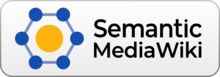

In [6]:
soup

In [4]:
import requests
from bs4 import BeautifulSoup

url = "https://wiki.guildwars2.com/wiki/The_Bifrost"

# Make a request to the URL
response = requests.get(url)

# Parse the HTML content of the response
soup = BeautifulSoup(response.content, "html.parser")

# Find the recipe box
recipe_box = soup.find('div', {'class': 'recipe-box'})

if recipe_box is not None:
    # Find the item name
    item_name = recipe_box.find('div', {'class': 'heading'}).text.strip()

    # Find the source and output quantity
    source = recipe_box.find('dt', string='Source').find_next_sibling('dd').text.strip()
    output_qty = recipe_box.find('dt', string='Output qty.').find_next_sibling('dd').text.strip()

    print(f"{item_name}\nSource: {source}; Output qty.: {output_qty}")

    # Find the ingredients section
    ingredients_section = recipe_box.find('div', {'class': 'ingredients'})

    if ingredients_section is not None:
        # Find all ingredients
        ingredients = ingredients_section.find_all('dl')

        print("Ingredients:")
        for ingredient in ingredients:
            quantity = ingredient.find('dt').text.strip()
            item = ingredient.find('dd').text.strip()
            print(f"{quantity} x {item}")
else:
    print("Recipe box not found.")


The Bifrost
Source: Mystic Forge; Output qty.: 1
Ingredients:
1 x The Legend


In [13]:
soup.find('span', {'class': 'mw-headline', 'id': 'Acquisition'})

<span class="mw-headline" id="Acquisition">Acquisition</span>

In [20]:
ingredients

[<dl><dt>1</dt>
 <dd><span class="small item-icon thumb-icon" style="padding-right: 0.25em;"><a href="/wiki/The_Legend" title="The Legend"><img alt="The Legend.png" data-file-height="64" data-file-width="64" decoding="async" height="64" src="/images/3/38/The_Legend.png" style="vertical-align: bottom" width="64"/></a></span><a href="/wiki/The_Legend" title="The Legend">The Legend</a></dd>
 <dt>1</dt>
 <dd><span class="small item-icon thumb-icon" style="padding-right: 0.25em;"><a href="/wiki/Gift_of_The_Bifrost" title="Gift of The Bifrost"><img alt="Gift of The Bifrost.png" data-file-height="64" data-file-width="64" decoding="async" height="64" src="/images/f/fc/Gift_of_The_Bifrost.png" style="vertical-align: bottom" width="64"/></a></span><a href="/wiki/Gift_of_The_Bifrost" title="Gift of The Bifrost">Gift of The Bifrost</a></dd>
 <dt>1</dt>
 <dd><span class="small item-icon thumb-icon" style="padding-right: 0.25em;"><a href="/wiki/Gift_of_Fortune" title="Gift of Fortune"><img alt="Gift

The Bifrost
Source: Mystic Forge; Output qty.: 1


In [31]:
import requests
from bs4 import BeautifulSoup

url = "https://wiki.guildwars2.com/wiki/The_Bifrost"

# Make a request to the URL
response = requests.get(url)

# Parse the HTML content of the response
soup = BeautifulSoup(response.content, "html.parser")

# Find the recipe box
recipe_box = soup.find('div', {'class': 'recipe-box'})

if recipe_box is not None:
    # Find the item name
    item_name = recipe_box.find('div', {'class': 'heading'}).text.strip()

    # Find the source and output quantity
    source = recipe_box.find('dt', string='Source').find_next_sibling('dd').text.strip()
    output_qty = recipe_box.find('dt', string='Output qty.').find_next_sibling('dd').text.strip()

    print(f"{item_name}\nSource: {source}; Output qty.: {output_qty}")

    # Find the ingredients section
    ingredients_section = recipe_box.find('div', {'class': 'ingredients'})

    if ingredients_section is not None:
        ingredients = ingredients_section.find_all('dd')
        for ingredient in ingredients:
            quantity = ingredient.find_previous_sibling('dt').text.strip()
            item = ingredient.text.strip()
            print(f"{quantity} x {item}")
           
else:
    print("Recipe box not found.")

The Bifrost
Source: Mystic Forge; Output qty.: 1
1 x The Legend
1 x Gift of The Bifrost
1 x Gift of Fortune
1 x Gift of Mastery


In [33]:
item

'Gift of Mastery'

In [15]:
import requests
from bs4 import BeautifulSoup

url = "https://wiki.guildwars2.com/wiki/The_Bifrost"

# Make a request to the URL
response = requests.get(url)

# Parse the HTML content of the response
soup = BeautifulSoup(response.content, "html.parser")

# Find the recipe box
recipe_box = soup.find('div', {'class': 'recipe-box'})

if recipe_box is not None:
    # Find the item name
    item_name = recipe_box.find('div', {'class': 'heading'}).text.strip()

    # Find the source and output quantity
    source = recipe_box.find('dt', string='Source').find_next_sibling('dd').text.strip()
    output_qty = recipe_box.find('dt', string='Output qty.').find_next_sibling('dd').text.strip()

    print(f"{item_name}\nSource: {source}; Output qty.: {output_qty}")

   # Find the ingredients section
    ingredients_section = recipe_box.find('div', {'class': 'ingredients'})

    if ingredients_section is not None:
    # Find the first ingredient
        ingredient = ingredients_section.find('dl')

        print("Ingredients:")
        while ingredient is not None:
            quantity = ingredient.find('dt').text.strip()
            item = ingredient.find('dd').text.strip()
            print(f"{quantity} x {item}")

        # Find the next ingredient
            ingredient = ingredient.find_next_sibling('dl')
           
    else:
        print("Recipe box not found.")


The Bifrost
Source: Mystic Forge; Output qty.: 1
Ingredients:
1 x The Legend


In [29]:
# Find the ingredients section
ingredients_section = recipe_box.find('div', {'class': 'ingredients'})

if ingredients_section is not None:
    # Find the first ingredient
    ingredient = ingredients_section.find('dl')

    print("Ingredients:")
    while ingredient is not None:
        quantity = ingredient.find('dt').text.strip()
        item = ingredient.find('dd').text.strip()
        print(f"{quantity} x {item}")

        # Find the next ingredient
        ingredient = ingredient.find_next_sibling('dd')


Ingredients:
1 x The Legend


In [25]:
ingredients_section


<div class="ingredients">
<dl><dt>1</dt>
<dd><span class="small item-icon thumb-icon" style="padding-right: 0.25em;"><a href="/wiki/The_Legend" title="The Legend"><img alt="The Legend.png" data-file-height="64" data-file-width="64" decoding="async" height="64" src="/images/3/38/The_Legend.png" style="vertical-align: bottom" width="64"/></a></span><a href="/wiki/The_Legend" title="The Legend">The Legend</a></dd>
<dt>1</dt>
<dd><span class="small item-icon thumb-icon" style="padding-right: 0.25em;"><a href="/wiki/Gift_of_The_Bifrost" title="Gift of The Bifrost"><img alt="Gift of The Bifrost.png" data-file-height="64" data-file-width="64" decoding="async" height="64" src="/images/f/fc/Gift_of_The_Bifrost.png" style="vertical-align: bottom" width="64"/></a></span><a href="/wiki/Gift_of_The_Bifrost" title="Gift of The Bifrost">Gift of The Bifrost</a></dd>
<dt>1</dt>
<dd><span class="small item-icon thumb-icon" style="padding-right: 0.25em;"><a href="/wiki/Gift_of_Fortune" title="Gift of For

In [18]:
# Find the ingredients section
ingredients_section = recipe_box.find('div', {'class': 'ingredients'})

if ingredients_section is not None:
    print("Ingredients:")
    # Find the first ingredient
    ingredient = ingredients_section.find('dl')

    while ingredient is not None and ingredient in ingredients_section:
        quantity = ingredient.find('dt').text.strip()
        item = ingredient.find('dd').text.strip()
        print(f"{quantity} x {item}")

        # Find the next ingredient
        ingredient = ingredient.find_next_sibling('dl')


Ingredients:
1 x The Legend


In [36]:
# Find the ingredients section
ingredients_section = recipe_box.find('div', {'class': 'ingredients'})
ingredients_list = []
if ingredients_section is not None:
    ingredients = ingredients_section.find_all('dd')
    for ingredient in ingredients:
        quantity = ingredient.find_previous_sibling('dt').text.strip()
        item = ingredient.text.strip()
        print(f"{quantity} x {item}")
        ingredients_list.append({'quantity': quantity, 'item': item})

1 x The Legend
1 x Gift of The Bifrost
1 x Gift of Fortune
1 x Gift of Mastery


In [37]:
ingredients_list

[{'quantity': '1', 'item': 'The Legend'},
 {'quantity': '1', 'item': 'Gift of The Bifrost'},
 {'quantity': '1', 'item': 'Gift of Fortune'},
 {'quantity': '1', 'item': 'Gift of Mastery'}]

In [50]:
contained_in_items

[<li class="smw-row"> <span class="small item-icon thumb-icon"><a href="/wiki/Legendary_Choice_Box" title="Legendary Choice Box"><img alt="Legendary Choice Box" data-file-height="64" data-file-width="64" decoding="async" height="20" src="/images/thumb/a/ae/Medical_Pack.png/20px-Medical_Pack.png" srcset="/images/thumb/a/ae/Medical_Pack.png/30px-Medical_Pack.png 1.5x, /images/thumb/a/ae/Medical_Pack.png/40px-Medical_Pack.png 2x" style="vertical-align: bottom" width="20"/></a></span> <span class="gray"><a href="/wiki/Legendary_Choice_Box" title="Legendary Choice Box">Legendary Choice Box</a> <small>(<b>choice</b>, discontinued)</small></span></li>,
 <li class="smw-row"> <span class="small item-icon thumb-icon"><a href="/wiki/Legendary_Reliquary" title="Legendary Reliquary"><img alt="Legendary Reliquary" data-file-height="128" data-file-width="128" decoding="async" height="20" src="/images/thumb/2/22/Daily_achievement_chest.png/20px-Daily_achievement_chest.png" srcset="/images/thumb/2/22/D

In [53]:
acquisition_section = soup.find('span', {'id': 'Acquisition'}).find_parent('h2')
if acquisition_section is not None:
    contained_in_section = acquisition_section.find_next_sibling('h3')
    contained_in_items_list = []
    if contained_in_section is not None:
        contained_in_items = contained_in_section.find_next_sibling('div').find_all('li')
        for item in contained_in_items:
            contained_in_items_list.append(item.text.strip())
else:
    contained_in_items_list = None

In [55]:
contained_in_items_list

['Legendary Choice Box (choice, discontinued)',
 'Legendary Reliquary (choice, discontinued)',
 'The Bifrost (guaranteed, discontinued)',
 'Tournament of Legends: First Place (choice, discontinued)']

In [ ]:
for ingredient in ingredients:
        quantity = ingredient.find_previous_sibling('dt').text.strip()
        item = ingredient.text.strip()
        print(f"{quantity} x {item}")
        ingredients_list.append({'quantity': quantity, 'item': item})